# Optimizing the Python Code for Big Data 
Balancing Coding Complexity against Computational Complexity 
    
    AUTHOR: Dr. Roy Jafari 

## Chapter 1: Effectively employing computational and memory resources 

### Understanding the distinction between computing and storing 
#### Example 1: computer resources orchestration when running a simple data processing

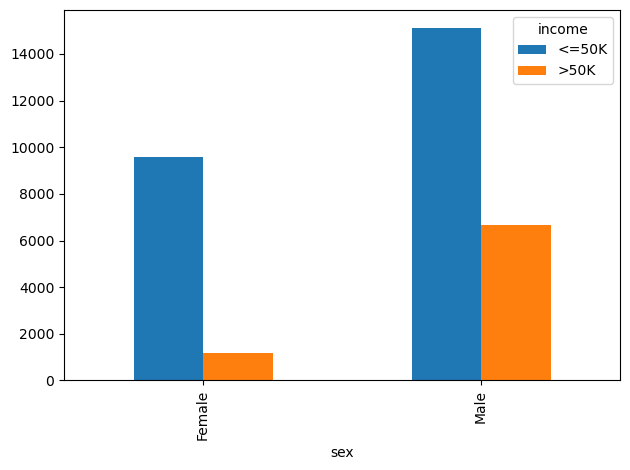

In [1]:
import pandas as pd #line1
import matplotlib.pyplot as plt #line2

adult_df = pd.read_csv('adult.csv') #line3
vis_df = (adult_df
          .groupby(['sex','income'])
          .size()
          .unstack()) #line4
del adult_df #line5
vis_df.plot.bar() #lin6
plt.tight_layout() #line7
plt.savefig('example_1.png') #line8

#### Mistake 1: Filling up the workspace
##### Example 2: Experiencing the consequences of making the mistake of filling up the workspace 
###### Setting up the experiment 

In [2]:
import time

def a_memory_intesive_task():
    list1 = [i for i in range(10**6)]
    list2 = [i for i in range(10**6,10**7)]
    list1.extend(list2)
    sorted(list(set(list1)))
    
def cal_mean_runtime(func,verbose=False):
    time_sum, n= 0, 5
    for i in range(n):
        t0 = time.time()
        func()
        t1 = time.time()
        time_sum += t1-t0
        if verbose:
            print((f'Experiemnt {i+1}: {t1-t0} (s)'))
    return time_sum/n

cal_mean_runtime(a_memory_intesive_task,verbose=True)

Experiemnt 1: 1.1548895835876465 (s)
Experiemnt 2: 1.2148430347442627 (s)
Experiemnt 3: 1.1216583251953125 (s)
Experiemnt 4: 1.0823793411254883 (s)
Experiemnt 5: 1.0930674076080322 (s)


1.1333675384521484

###### Experimenting

In [3]:
import psutil
import sys
import pandas as pd

metrics = ['CPU %','RAM (GB)',
           'RAM %', 'Computer Performance']
report_df = pd.DataFrame(index=range(100),
                         columns= metrics)

def report_cup_ram():
    out_sr = pd.Series(index = metrics,dtype=float)
    out_sr['RAM %'] = psutil.virtual_memory()[2]
    out_sr['RAM (GB)'] = psutil.virtual_memory()[3]/10**9
    out_sr['CPU %'] = psutil.cpu_percent()
    out_sr['Computer Performance'] = None
    
    return out_sr

def use_the_data(data_list):
    for data in data_list:
        data[0]

df = pd.DataFrame(0.0001,
                  index=range(10**7),
                  columns=['C1','C2'])

all_data = []

for i in range(100):
    all_data.append(df.copy().values.tolist())
    use_the_data(all_data)       
    report_df.loc[i] = report_cup_ram()
    use_the_data(all_data)        
    report_df.loc[i]['Computer Performance'] = (
        cal_mean_runtime(a_memory_intesive_task)
    )
    print(report_df.loc[i])
    if report_df.loc[i]['RAM %'] >= 95:
        break

CPU %                       12.2
RAM (GB)                9.842344
RAM %                       58.8
Computer Performance    1.137451
Name: 0, dtype: object
CPU %                        19.2
RAM (GB)                11.077726
RAM %                        66.2
Computer Performance     1.106877
Name: 1, dtype: object
CPU %                        19.1
RAM (GB)                12.587749
RAM %                        75.2
Computer Performance     1.083366
Name: 2, dtype: object
CPU %                        19.1
RAM (GB)                13.892633
RAM %                        83.0
Computer Performance     1.136519
Name: 3, dtype: object
CPU %                        20.0
RAM (GB)                15.332442
RAM %                        91.6
Computer Performance      1.20782
Name: 4, dtype: object
CPU %                        20.6
RAM (GB)                16.122425
RAM %                        96.3
Computer Performance     8.075645
Name: 5, dtype: object


In [4]:
del all_data, df

In [5]:
report_df.dropna()

,CPU %,RAM (GB),RAM %,Computer Performance
0,12.2,9.842344,58.8,1.137451
1,19.2,11.077726,66.2,1.106877
2,19.1,12.587749,75.2,1.083366
3,19.1,13.892633,83.0,1.136519
4,20.0,15.332442,91.6,1.20782
5,20.6,16.122425,96.3,8.075645


C:\Users\roy_jafari\Anaconda3\lib\site-packages\pandas\core\indexes\base.py:6999: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


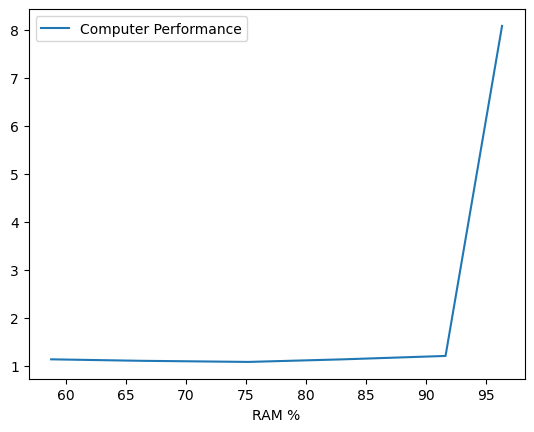

In [10]:
report_df.dropna().set_index('RAM %')['Computer Performance'].plot()
plt.legend()
plt.savefig('images/example2.png',dpi=500)

##### Mistake 2: Misusing the worker
###### Example 3: Experiencing the consequences of making the mistake of misusing the worker

In [7]:
import time
import pandas as pd

t0= time.time()

total_sum = 0
for i in range(1000):
    total_sum += pd.read_csv('adult.csv').iloc[i].age
    
mean_age = total_sum/1000
print(f'Mean Age is {mean_age} and it took {time.time()-t0} (s) to run.')

Mean Age is 38.051 and it took 55.504719257354736 (s) to run.


In [8]:
t0= time.time()
df = pd.read_csv('adult.csv')

total_sum = 0
for i in range(1000):
    total_sum += df.iloc[i].age
    
mean_age = total_sum/1000
print(f'Mean Age is {mean_age} and it took {time.time()-t0} (s) to run.')

Mean Age is 38.051 and it took 0.13318967819213867 (s) to run.


In [9]:
t0= time.time()
df = pd.read_csv('adult.csv')
mean_age = df.age.iloc[:1000].mean()
print(f'Mean Age is {mean_age} and it took {time.time()-t0} (s) to run.')

Mean Age is 38.051 and it took 0.0630044937133789 (s) to run.


### Challenge 1: Loop or Map?

In [11]:
#randomly creating person_df.csv
import pandas as pd
import numpy as np

n = 30000
person_df = pd.DataFrame(index=range(n), columns=['Height','Weight'])
person_df.Height = np.random.normal(178,10,n)
person_df.Weight = np.random.normal(83,7,n)
person_df['BMI'] = person_df.Weight / ((person_df.Height/100)**2) 
person_df['Gender'] = np.random.binomial(1,0.4988,n)
person_df = person_df.replace({0:'M',1:'F'})
person_df.to_csv('person_df.csv', index=False)

In [12]:
import pandas as pd

person_df = pd.read_csv('person_df.csv')

for i,row in person_df.iterrows():

    if(row.Gender == 'M'):
        if(row.BMI<20):
            person_df.loc[i,'Status'] = 'Underweight'
        elif(row.BMI<=25):
            person_df.loc[i,'Status'] = 'Healthy'
        else:
            person_df.loc[i,'Status'] = 'Overweight'
            
    else:
        if(row.BMI<19):
            person_df.loc[i,'Status'] = 'Underweight'
        elif(row.BMI<=24):
            person_df.loc[i,'Status'] = 'Healthy'
        else:
            person_df.loc[i,'Status'] = 'Overweight'

In [13]:
import pandas as pd

person_df = pd.read_csv('person_df.csv')

def specifyStatus(gender,bmi):
    if(gender == 'M'):
        if(bmi<20):
            return 'Underweight'
        elif(bmi<=25):
            return 'Healthy'
        else:
            return 'Overweight'
    else:
        if(bmi<19):
            return 'Underweight'
        elif(bmi<=24):
            return 'Healthy'
        else:
            return 'Overweight'

person_df['Status'] = list(
    map(specifyStatus,person_df.Gender,person_df.BMI)
    )

### Challenge 2: Iterative or Recursive?

In [14]:
def multiply(a,b):
    print(f'multiply({a},{b})')
    if b==1: return a
    return a + multiply(a,b-1)

In [15]:
multiply(100,4)

multiply(100,4)
multiply(100,3)
multiply(100,2)
multiply(100,1)


400

#### Practice writing a recursive function

In [16]:
def factorial_iterative(n):
    output = 1
    
    for i in range(n):
        output *= (i+1)
    
    return output

In [17]:
%%time
factorial_iterative(30)

Wall time: 0 ns


265252859812191058636308480000000

In [18]:
def factorial_recursive(n):
    if n==1: return n
    return n*factorial_recursive(n-1)

In [19]:
%%time
factorial_recursive(30)

Wall time: 0 ns


265252859812191058636308480000000

#### The case study: coming up with a sorting algorithm

In [206]:
def sort_iterative(num_list):
    sorted_array = [num_list.pop()]
    while num_list:
        num = num_list.pop()
        i = 0
        while sorted_array and sorted_array[i]<=num:
            i+=1
        sorted_array.insert(i,num)
    return sorted_array

In [205]:
def sort_recursive(num_list):
    if not num_list:
        return num_list
    
    pivot = num_list.pop()
    left = [n for n in num_list if n<= pivot]
    right = [n for n in num_list if n> pivot]
    
    return (sort_recursive(left)+
            [pivot] +
            sort_recursive(right)
           )

### Speaking the Big O Notation

In [1]:
def sum_of_numbers(num_list):
    n = len(num_list)
    sum_output = 0
    for i in range(n):
        sum_output += num_list[i]
        
    return sum_output

In [4]:
sum_of_numbers([1,2,3,4,2,1,2,3,4,2,1,2])

27

#### Learning the Common Big O Complexities

##### O(1) - Constant Complexity

In [1]:
def first_last_elements(num_list):
    return num_list[0],num_list[-1]

In [2]:
first_last_elements([100,200,300,400,500])

(100, 500)

##### O(n) – Linear Complexity

In [3]:
def brute_force_find_index(num_list,val):
    for i,num in enumerate(num_list):
        if(num == val):
            return i
    return -1

In [4]:
brute_force_find_index([2, 10, 23, 30, 100, 123, 200, 500],23)

2

In [5]:
def recursive_find_index(num_list,low,high,val):
    if high >= low:
        mid = (high + low) // 2
        
        if num_list[mid] == val:
            return mid
        elif num_list[mid] > val:
            return recursive_find_index(num_list,
                                      low, mid - 1, val)
        else:
            return recursive_find_index(num_list,
                                        mid + 1, high, val)
    else:
        return -1

In [6]:
def binary_search_find_index(num_list,val):  
    
    low = 0
    high = len(num_list) - 1
    
    return recursive_find_index(num_list,low,high,val)

In [7]:
binary_search_find_index([2, 10, 23, 30, 100, 123, 200, 500],100)

4

###### Comparing O(n) and O(log n)

In [16]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt


df_index = [2**i for i in range(1,26)]
functions_dic = {'brute_force':brute_force_find_index,
                 'binary_search':binary_search_find_index}
result_df = pd.DataFrame(0.0, index = df_index,
                         columns = functions_dic.keys())
n_repeat = 50
for i,row in result_df.iterrows():
    num_list = [num for num in range(i)]
    for r in range(n_repeat):
        val = np.random.randint(i)
        
        for key in functions_dic.keys():
            t0 = time.time()
            functions_dic[key](num_list,val)
            result_df.at[i,key] +=time.time()-t0
        
for i,row in result_df.iterrows():
    for key in functions_dic.keys():
        result_df.at[i,key] = result_df.at[i,key]/n_repeat   

In [17]:
result_df

,brute_force,binary_search
2,0.000000,0.000020
4,0.000020,0.000020
8,0.000000,0.000000
16,0.000040,0.000000
32,0.000000,0.000020
64,0.000000,0.000020
128,0.000005,0.000028
256,0.000000,0.000045
512,0.000040,0.000000
1024,0.000041,0.000044


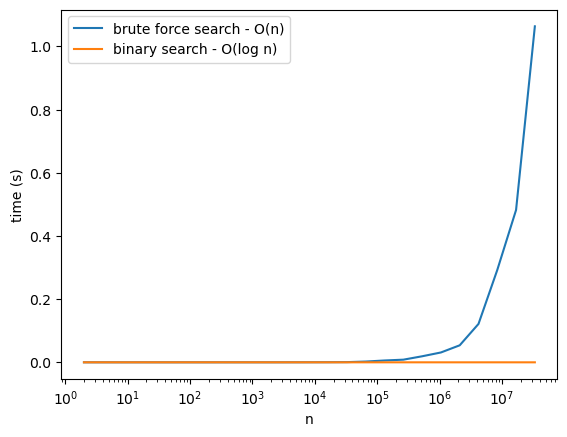

In [18]:
result_df.brute_force.plot(logx=True, label = 'brute force search - O(n)')
result_df.binary_search.plot(logx=True, label = 'binary search - O(log n)')
plt.xlabel('n')
plt.ylabel('time (s)')
plt.legend()
plt.savefig('images/brute_force_vs_binary_search.png',dpi=500)

##### O(n2) – Quadratic Complexity

In [19]:
def sort_iterative(num_list):
    sorted_array = [num_list.pop()]
    while num_list:
        num = num_list.pop()
        i = 0
        while len(sorted_array)>i and sorted_array[i]<=num:
            i+=1
        sorted_array.insert(i,num)
    return sorted_array

In [20]:
sort_iterative([5,1,10,2,4,6,7,3,9])

[1, 2, 3, 4, 5, 6, 7, 9, 10]

##### O(n log n) -  Linearithmic  Complexity

In [21]:
def sort_recursive(num_list):
    if not num_list:
        return num_list
    
    pivot = num_list.pop()
    left = [n for n in num_list if n<= pivot]
    right = [n for n in num_list if n> pivot]
    
    return (sort_recursive(left)+
            [pivot] +
            sort_recursive(right)
           )

In [22]:
sort_recursive([5,1,10,2,4,6,7,3,9])

[1, 2, 3, 4, 5, 6, 7, 9, 10]

##### Comparing O(n2) and O(n long n)

In [23]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt


df_index = [2**i for i in range(1,16)]
functions_dic = {'sort_iterative':sort_iterative,
                 'sort_recursive':sort_recursive}
result_df = pd.DataFrame(0.0, index = df_index,
                         columns = functions_dic.keys())
n_repeat = 2
for i,row in result_df.iterrows():
    for r in range(n_repeat):
        num_list = np.random.random(i).tolist()
        for key in functions_dic.keys():
            t0 = time.time()
            functions_dic[key](num_list.copy())
            result_df.at[i,key] +=time.time()-t0
        
for i,row in result_df.iterrows():
    for key in functions_dic.keys():
        result_df.at[i,key] = result_df.at[i,key]/n_repeat

In [24]:
result_df

,sort_iterative,sort_recursive
2,0.000000,0.000000
4,0.000000,0.000000
8,0.000000,0.000000
16,0.000000,0.000000
32,0.000501,0.000000
64,0.000000,0.000497
128,0.001648,0.000499
256,0.003994,0.000990
512,0.019457,0.002492
1024,0.077343,0.003615


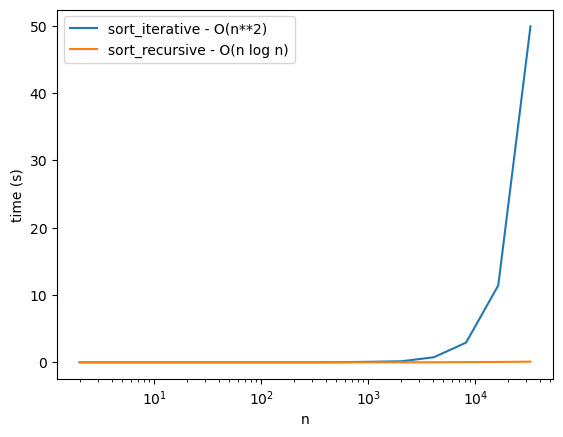

In [25]:
result_df.sort_iterative.plot(logx=True, label = 'sort_iterative - O(n**2)')
result_df.sort_recursive.plot(logx=True, label = 'sort_recursive - O(n log n)')


plt.xlabel('n')
plt.ylabel('time (s)')
plt.legend()
plt.savefig('images/sort_iterative_vs_sort_recursive.png',dpi=500)

##### O(n3) - Cubic Complexity

In [26]:
def find_triplets_brute(num_list):
    
    output = []
    
    n = len(num_list)
    for i in range(n):
        for j in range(i+1,n):
            for k in range(j+1,n):
                if (num_list[i] +
                    num_list[j] +
                    num_list[k]) == 0:
                    output.append([
                        num_list[i],
                        num_list[j],
                        num_list[k]])
    return output

In [27]:
find_triplets_brute([-2, -1, 0, 2, 3])

[[-2, -1, 3], [-2, 0, 2]]

##### Example of decreasing computational complexity at the expense of memory complexity

In [28]:
def find_doubles_hashtable(num_list,val):
    hash_table = {}
    output = []
    for num in num_list:
        
        if num in hash_table:
            output.append((hash_table[num],num))
        
        hash_table[val-num] = num
        
        
    return output

In [29]:
find_doubles_hashtable([-2, -1, 0, 2, 3],-1)

[(-1, 0)]

In [30]:
def find_doubles_brute(num_list,val):
    output = []
    n = len(num_list)
    for i in range(n):
        for j in range(i+1,n):
            if (num_list[i] +
                num_list[j]) == val:
                    output.append([
                        num_list[i],
                        num_list[j]])        
        
    return output

In [31]:
find_doubles_brute([-2, -1, 0, 2, 3],-1)

[[-1, 0]]

In [32]:
def find_triplets_hashtable(num_list):
    
    output = []
    
    while num_list:
        n1 = num_list.pop()
        
        doubles = find_doubles_hashtable(num_list,-n1)
        for double in doubles:
            output.append((double[0],double[1],n1))
            
    return output

In [33]:
find_triplets_hashtable([-2, -1, 0, 2, 3])

[(-2, -1, 3), (-2, 0, 2)]

##### Comparing O(n2) and O(n3)

In [34]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt


df_index = [2**i for i in range(1,11)]
functions_dic = {'find_triplets_brute':find_triplets_brute,
                 'find_triplets_hashtable':find_triplets_hashtable}
result_df = pd.DataFrame(0.0, index = df_index,
                         columns = functions_dic.keys())
n_repeat = 2
for i,row in result_df.iterrows():
    for r in range(n_repeat):
        num_list = np.random.random(i).tolist()
        for key in functions_dic.keys():
            t0 = time.time()
            functions_dic[key](num_list.copy())
            result_df.at[i,key] +=time.time()-t0
        
for i,row in result_df.iterrows():
    for key in functions_dic.keys():
        result_df.at[i,key] = result_df.at[i,key]/n_repeat

In [35]:
result_df

,find_triplets_brute,find_triplets_hashtable
2,0.000000,0.000000
4,0.000543,0.000000
8,0.000000,0.000000
16,0.000000,0.000000
32,0.001505,0.000479
64,0.009547,0.000989
128,0.062418,0.002990
256,0.378836,0.005986
512,3.026804,0.030529
1024,23.682112,0.125453


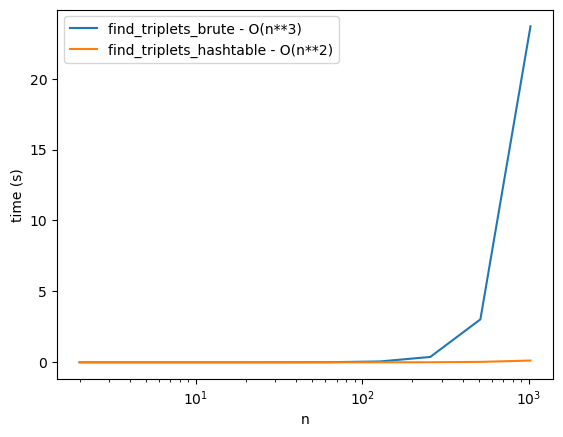

In [36]:
result_df.find_triplets_brute.plot(logx=True, label = 'find_triplets_brute - O(n**3)')
result_df.find_triplets_hashtable.plot(logx=True, label = 'find_triplets_hashtable - O(n**2)')

plt.xlabel('n')
plt.ylabel('time (s)')
plt.legend()
plt.savefig('images/find_triplets_brute_vs_find_triplets_hashtable.png',dpi=500)

##### O(2n) – Exponential Complexity

In [36]:
from itertools import combinations 
def find_sumzero_subset(array):
    
    output = []
    n = len(array)
    
    for i in range(1,n+1):
        for subset in combinations(array,i):
            if sum(subset)==0:
                output.append(subset)    
    return output

In [38]:
find_sumzero_subset([1,2,-3,4,0,5])

[(0,), (1, 2, -3), (1, 2, -3, 0)]

In [43]:
import numpy as np
import pandas as pd
import time

df_index = range(1,26)
result_df = pd.DataFrame(0.0, index = df_index,
                         columns = ['time'])
n_repeat = 2
for i,row in result_df.iterrows():
    for r in range(n_repeat):
        t0 = time.time()
        find_sumzero_subset(np.random.random(i))
        result_df.at[i,'time'] +=time.time()-t0

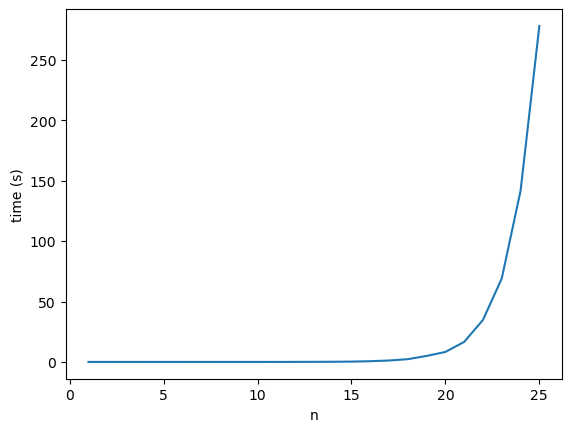

In [52]:
import matplotlib.pyplot as plt
result_df.time.plot()
plt.ylabel('time (s)')
plt.xlabel('n')
plt.savefig('images/exponentialComplexity.png',dpi=500)

In [53]:
2**25-1

33554431

In [56]:
250 / (2**25-1)

7.45058081896844e-06

In [57]:
250 / (2**25-1)*1000

0.00745058081896844

In [68]:
0.0074 * (2**50-1)

8331659310635.41

In [70]:
0.0074 * (2**50-1) /1000/60/60/24/365

264.1951836198443

##### O(n!) – Factorial Complexity

In [4]:
from itertools import permutations
def tsp_brute_force(distances):
    
    n_cities = len(distances)    
    cities = [i for i in range(n_cities)]
    
    best_path = None
    min_travel = float('inf')
    
    for travel_path in permutations(cities,n_cities):
        travel_dist = path_distance(travel_path,distances)
        
        if  travel_dist < min_travel:
            min_travel = travel_dist
            best_path = travel_path
            
    return (best_path,min_travel)

In [5]:
def path_distance(path,distances):
    distance = 0 
    dep_i,des_i = 0, 1
    distance += distances[path[dep_i],path[des_i]]
    
    while des_i < len(path)-1:
        dep_i +=1
        des_i +=1
        distance += distances[path[dep_i],path[des_i]]
    return distance

In [6]:
import numpy as np
distances = np.array(
    [[0,9,3,9],
     [2,0,4,9],
     [8,4,0,1],
     [7,4,5,0]])
distances

array([[0, 9, 3, 9],
       [2, 0, 4, 9],
       [8, 4, 0, 1],
       [7, 4, 5, 0]])

In [7]:
distances[0,2]

3

In [8]:
distances = np.array(
    [[0,9,3,9],
     [2,0,4,9],
     [8,4,0,1],
     [7,4,5,0]])

tsp_brute_force(distances)

((1, 0, 2, 3), 6)

### Challenge 3: Patterns or Invention?
#### Example of Sliding Window pattern

In [9]:
def moving_average_brute_force(K,series):
    result = []
    n= len(series)
    for i in range(n-K+1):
        result.append(sum(series[i:i+K])/K)
    return(result)    

In [10]:
def moving_average_sliding_window(K,series):
    result=[]
    n = len(series)
    
    _sum = sum(series[:K])
    result.append(_sum/K)
    
    for i in range(n-K):
        _sum -=series[i]
        _sum +=series[i+K]
        result.append(_sum/K)
    
    return (result)

In [11]:
series = [i for i in range(10**6)]

In [12]:
%%time
moving_average_brute_force(100,series)

Wall time: 2.6 s


[49.5,
 50.5,
 51.5,
 52.5,
 53.5,
 54.5,
 55.5,
 56.5,
 57.5,
 58.5,
 59.5,
 60.5,
 61.5,
 62.5,
 63.5,
 64.5,
 65.5,
 66.5,
 67.5,
 68.5,
 69.5,
 70.5,
 71.5,
 72.5,
 73.5,
 74.5,
 75.5,
 76.5,
 77.5,
 78.5,
 79.5,
 80.5,
 81.5,
 82.5,
 83.5,
 84.5,
 85.5,
 86.5,
 87.5,
 88.5,
 89.5,
 90.5,
 91.5,
 92.5,
 93.5,
 94.5,
 95.5,
 96.5,
 97.5,
 98.5,
 99.5,
 100.5,
 101.5,
 102.5,
 103.5,
 104.5,
 105.5,
 106.5,
 107.5,
 108.5,
 109.5,
 110.5,
 111.5,
 112.5,
 113.5,
 114.5,
 115.5,
 116.5,
 117.5,
 118.5,
 119.5,
 120.5,
 121.5,
 122.5,
 123.5,
 124.5,
 125.5,
 126.5,
 127.5,
 128.5,
 129.5,
 130.5,
 131.5,
 132.5,
 133.5,
 134.5,
 135.5,
 136.5,
 137.5,
 138.5,
 139.5,
 140.5,
 141.5,
 142.5,
 143.5,
 144.5,
 145.5,
 146.5,
 147.5,
 148.5,
 149.5,
 150.5,
 151.5,
 152.5,
 153.5,
 154.5,
 155.5,
 156.5,
 157.5,
 158.5,
 159.5,
 160.5,
 161.5,
 162.5,
 163.5,
 164.5,
 165.5,
 166.5,
 167.5,
 168.5,
 169.5,
 170.5,
 171.5,
 172.5,
 173.5,
 174.5,
 175.5,
 176.5,
 177.5,
 178.5,
 179.5,
 18

In [13]:
%%time
moving_average_sliding_window(100,series)

Wall time: 420 ms


[49.5,
 50.5,
 51.5,
 52.5,
 53.5,
 54.5,
 55.5,
 56.5,
 57.5,
 58.5,
 59.5,
 60.5,
 61.5,
 62.5,
 63.5,
 64.5,
 65.5,
 66.5,
 67.5,
 68.5,
 69.5,
 70.5,
 71.5,
 72.5,
 73.5,
 74.5,
 75.5,
 76.5,
 77.5,
 78.5,
 79.5,
 80.5,
 81.5,
 82.5,
 83.5,
 84.5,
 85.5,
 86.5,
 87.5,
 88.5,
 89.5,
 90.5,
 91.5,
 92.5,
 93.5,
 94.5,
 95.5,
 96.5,
 97.5,
 98.5,
 99.5,
 100.5,
 101.5,
 102.5,
 103.5,
 104.5,
 105.5,
 106.5,
 107.5,
 108.5,
 109.5,
 110.5,
 111.5,
 112.5,
 113.5,
 114.5,
 115.5,
 116.5,
 117.5,
 118.5,
 119.5,
 120.5,
 121.5,
 122.5,
 123.5,
 124.5,
 125.5,
 126.5,
 127.5,
 128.5,
 129.5,
 130.5,
 131.5,
 132.5,
 133.5,
 134.5,
 135.5,
 136.5,
 137.5,
 138.5,
 139.5,
 140.5,
 141.5,
 142.5,
 143.5,
 144.5,
 145.5,
 146.5,
 147.5,
 148.5,
 149.5,
 150.5,
 151.5,
 152.5,
 153.5,
 154.5,
 155.5,
 156.5,
 157.5,
 158.5,
 159.5,
 160.5,
 161.5,
 162.5,
 163.5,
 164.5,
 165.5,
 166.5,
 167.5,
 168.5,
 169.5,
 170.5,
 171.5,
 172.5,
 173.5,
 174.5,
 175.5,
 176.5,
 177.5,
 178.5,
 179.5,
 18

#### Challenge prompts
#### Two Pointers Coding Pattern

In [2]:
def find_doubles_brute(num_list,val):
    output = []
    n = len(num_list)
    for i in range(n):
        for j in range(i+1,n):
            if (num_list[i] +
                num_list[j]) == val:
                    output.append([
                        num_list[i],
                        num_list[j]])        
    return output

In [3]:
find_doubles_brute([-2, -1, 0, 2, 3],-1)

[[-1, 0]]

In [14]:
def find_doubles_two_pointers(num_list,val):
    output = [] 
    p1,p2 = 0, len(num_list)-1
    
    while p1!=p2:
        
        _sum_val = num_list[p1] + num_list[p2]
        
        if _sum_val < val:
            p1 +=1
        elif _sum_val > val:
            p2 -=1
        else:
            output.append([num_list[p1], num_list[p2]])
            p1 +=1
    return output

In [15]:
find_doubles_two_pointers([-2, -1, 0, 2, 3],-1)

[[-1, 0]]